In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [13]:
# create a directed graph
g = nx.DiGraph()

In [14]:
# addes nodes
g.add_nodes_from([i for i in range(10)])

In [17]:
# add edges
def add_edges():
    nodes = g.nodes()
    for s in nodes:
        for t in nodes:
            if s != t:
                r= random.random() #so as to get a random grapg everytime
                if r <= 0.5:
                    g.add_edge(s, t)
    return g
g = add_edges()

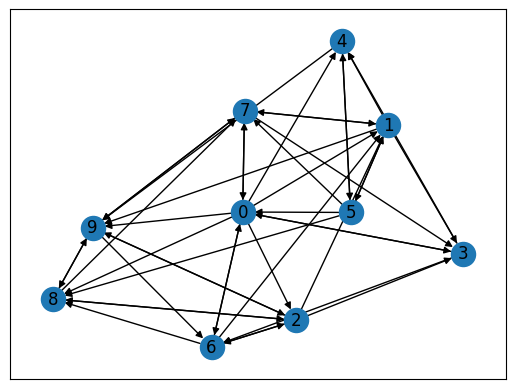

In [19]:
# now visuliaze the graph
nx.draw_networkx(g, with_labels=True)
plt.show()

In [20]:
# assign initial points to each node

def assign_points(g):
    nodes = list(g.nodes())
    p=[]
    for each in nodes:
        p.append(100)
    return p

points = assign_points(g)

In [22]:
# keep distrubuting points untill convergence

def  distribute_points(g, points):
    nodes = list(g.nodes())
    new_points = []
    for i in range(len(nodes)):
        new_points.append(0)
    
    for n in nodes:
        out = list(g.out_edges(n))
        if len(out)==0:
            new_points[n] += points[n]
        else:
            share = points[n]/len(out)
            for (src, tgt) in out:
                new_points[tgt] += share
    return new_points

def keep_on_distributing(g, points):
    while(1): #infinite loop
        new_points = distribute_points(g, points)
        print(new_points)
        points = new_points
        stop = input("Press # to stop or any other key to continue")
        if stop == "#":
            break
    return new_points

final_points = keep_on_distributing(g, points)

[103.33333333333334, 102.5, 95.83333333333334, 77.5, 85.83333333333334, 70.0, 90.83333333333334, 110.83333333333334, 102.5, 160.83333333333334]


[90.25, 96.5, 110.0, 80.29166666666669, 73.25, 63.41666666666667, 98.125, 121.79166666666669, 109.0, 157.375]
[94.42638888888891, 100.94375000000001, 111.48958333333334, 83.02916666666667, 70.02847222222223, 55.925, 99.3888888888889, 118.94166666666666, 109.83958333333334, 155.9875]
[93.44402777777778, 99.86885416666668, 112.26059027777778, 84.02538194444445, 70.85343750000001, 55.202986111111116, 100.77447916666668, 118.78711805555557, 109.13031250000002, 155.6528125]
[93.93945717592592, 100.06361805555557, 112.16409722222224, 83.803171875, 70.70333217592592, 55.40048958333334, 101.05428530092593, 117.98484548611111, 109.28004166666668, 155.60666145833335]
[93.77427123842594, 100.01513220486112, 112.33434939236112, 83.68418657407408, 70.76964429976853, 55.364389699074074, 101.01130758101853, 118.16359959490741, 109.42058619791668, 155.46253321759258]


In [23]:
# rank by points 
def rank_by_points(final_points):
    # which node has got, how many points
    d = {}
    for i in range(len(final_points)):
        d[i] = final_points[i]
    print(sorted(d.items(), key = lambda f:f[1]))

rank_by_points(final_points)

[(5, 55.364389699074074), (4, 70.76964429976853), (3, 83.68418657407408), (0, 93.77427123842594), (1, 100.01513220486112), (6, 101.01130758101853), (8, 109.42058619791668), (2, 112.33434939236112), (7, 118.16359959490741), (9, 155.46253321759258)]


In [24]:
# default networkx function
result = nx.pagerank(g)
print(sorted(result.items(), key = lambda f:f[1]))

[(5, 0.06484071143626156), (4, 0.07725806173741087), (3, 0.0849644919977869), (0, 0.0955873297641591), (6, 0.09907293734595402), (1, 0.1000346589991614), (8, 0.10707565774099624), (2, 0.10802650635218351), (7, 0.1150020598506027), (9, 0.1481375847754836)]
